In [443]:
import pandas as pd
import numpy as np

import json
import glob
import requests

In [444]:
Home_Ping = glob.glob("Home/Ping/*")
LTE_Ping = glob.glob("LTE/Ping/*")
WIFI_Ping = glob.glob("WIFI/Ping/*")
Fiber_Ping = glob.glob("Fiber/Ping/*")
Cable_Ping = glob.glob("Cable/Ping/*")
#Starlink = glob.glob("Starlink/Starlink.json")


In [458]:
uk = ["49734670", "49734729", "49734632", "49162558", "49206580", "Starlink"]
eu_AZ = ["49974882", "49975022", "49975088"]
ca = ["49734671", "49734730", "49734633", "49206920", "49206841"]
india = ["49734672", "49734731", "49734634", "49206768", "49206779"]

In [463]:
def createDataList(ping):
    p_list = []
    loc = None
    for p in ping:
        if any(loc in p for loc in uk):
            loc = "UK"
        elif any(loc in p for loc in ca):
            loc = "CA"
        elif any(loc in p for loc in india):
            loc = "IN"
        elif any(loc in p for loc in eu_AZ):
            loc = "EU_AZ"
        else:
             loc = "UK"
        f = open(p)
        p_data = json.load(f)
        for i in p_data:
            fw = i["fw"]
            time = pd.to_datetime(i["timestamp"], unit="s")
            min = i["min"]
            max = i["max"]
            avg = i["avg"]
            pid = i["prb_id"]
            
            p_list.append([int(fw), int(time.hour), int(min), int(max), int(avg), pid,loc])
    return p_list

In [464]:
df = pd.read_json("Starlink/Starlink.json")

url = "https://atlas.ripe.net/api/v2/probes/1001356/"   
resp = requests.get(url)
resp_json = resp.json()
#print(resp_json)

cc = resp_json['country_code'] = resp_json['country_code']

In [451]:
homeList = createDataList(Home_Ping)
lteList = createDataList(LTE_Ping)
wifiList = createDataList(WIFI_Ping)
fiberList = createDataList(Fiber_Ping)
cableList = createDataList(Cable_Ping)


In [465]:
starList = createDataList(["Starlink/Starlink.json"])

In [467]:
df_starlink = pd.DataFrame (starList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'pid','loc'])
df_starlink

,fw,timestamp,min,max,avg,pid,loc
0,5020,12,72,91,81,1001356,UK
1,5080,12,21,32,27,13851,UK
2,5080,12,289,308,302,60892,UK
3,5080,12,55,58,56,61498,UK
4,5040,12,39,50,45,1002750,UK
...,...,...,...,...,...,...,...
9292,5080,10,22,38,28,61366,UK
9293,5080,10,114,120,117,61731,UK
9294,5080,10,155,163,159,62741,UK
9295,5080,10,158,170,163,62868,UK


In [476]:
unique_pid = df_starlink['pid'].unique()

cc = {}
for pid in unique_pid:
    url = "https://atlas.ripe.net/api/v2/probes/"+str(pid)+""
    resp = requests.get(url)
    resp_json = resp.json()
    cc[pid] = resp_json['country_code']

In [478]:
cc

{1001356: 'BE',
 13851: 'NL',
 60892: 'AU',
 61498: 'ES',
 1002750: 'DE',
 1003131: 'BE',
 1004453: 'AU',
 19648: 'US',
 50017: 'US',
 53798: 'US',
 54330: 'US',
 55492: 'CA',
 60323: 'DE',
 61241: 'FR',
 62843: 'FR',
 1004876: 'IT',
 1004978: 'IT',
 19983: 'AU',
 54088: 'FR',
 60328: 'GB',
 60510: 'CA',
 61365: 'US',
 62417: 'US',
 10743: 'US',
 12426: 'US',
 20544: 'PL',
 24742: 'AU',
 35681: 'AT',
 61081: 'US',
 62498: 'US',
 1001040: 'US',
 1002289: 'DE',
 15623: 'ES',
 21965: 'CZ',
 23127: 'US',
 35042: 'CA',
 52422: 'US',
 62365: 'US',
 62868: 'US',
 62956: 'US',
 22802: 'US',
 28221: 'US',
 60929: 'US',
 61780: 'US',
 61899: 'US',
 13040: 'FR',
 17979: 'GB',
 28: 'US',
 50008: 'DE',
 60234: 'US',
 61366: 'GB',
 61731: 'US',
 62741: 'US',
 63024: 'AU',
 52955: 'NZ',
 4195: 'UA'}

In [346]:
df_homeping = pd.DataFrame (homeList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'pid','loc'])
df_homeping

,fw,timestamp,min,max,avg,loc
0,5080,12,23,30,25,UK
1,4790,12,17,22,20,UK
2,4790,12,9,10,9,UK
3,5080,12,20,20,20,UK
4,4790,12,33,35,34,UK
...,...,...,...,...,...,...
54437,5080,20,47,48,48,EU_AZ
54438,5080,20,59,65,61,EU_AZ
54439,5080,20,208,208,208,EU_AZ
54440,5080,20,18,19,18,EU_AZ


In [347]:
df_lteping = pd.DataFrame (lteList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'pid','loc'])
df_lteping

,fw,timestamp,min,max,avg,loc
0,5080,19,29,44,36,UK
1,5040,19,28,28,28,UK
2,5080,19,41,44,43,UK
3,5020,19,57,77,64,UK
4,5020,19,106,115,111,UK
...,...,...,...,...,...,...
47749,5080,20,48,56,51,EU_AZ
47750,4790,20,249,257,252,EU_AZ
47751,5080,20,36,38,36,EU_AZ
47752,5080,20,28,36,31,EU_AZ


In [348]:
df_wifiping = pd.DataFrame (wifiList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'pid','loc'])
df_wifiping

,fw,timestamp,min,max,avg,loc
0,5080,10,36,37,37,UK
1,5080,10,41,41,41,UK
2,5080,10,41,50,45,UK
3,5020,10,225,225,225,UK
4,5080,10,49,52,50,UK
...,...,...,...,...,...,...
45093,5080,20,70,125,91,EU_AZ
45094,5080,20,40,40,40,EU_AZ
45095,5080,20,90,93,91,EU_AZ
45096,5080,20,95,95,95,EU_AZ


In [358]:
df_fiberping = pd.DataFrame (fiberList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'pid','loc'])
df_fiberping

,fw,timestamp,min,max,avg,loc
0,4790,10,80,80,80,UK
1,4790,10,31,31,31,UK
2,4790,10,10,11,11,UK
3,4790,10,23,23,23,UK
4,4790,10,24,25,25,UK
...,...,...,...,...,...,...
40107,4790,9,135,136,135,IN
40108,4790,9,269,272,270,IN
40109,4790,9,146,148,147,IN
40110,4790,9,131,167,148,IN


In [359]:
df_cableping = pd.DataFrame (cableList, columns = ['fw', 'timestamp', 'min', 'max', 'avg', 'pid','loc'])
df_cableping

,fw,timestamp,min,max,avg,loc
0,4790,10,252,256,254,UK
1,4790,10,91,92,92,UK
2,5080,10,41,66,53,UK
3,5080,10,107,132,116,UK
4,5080,10,106,111,108,UK
...,...,...,...,...,...,...
75859,4790,9,-1,-1,-1,IN
75860,4790,9,150,153,152,IN
75861,5080,10,124,124,124,IN
75862,5080,10,248,249,249,IN


Description of all

In [479]:
df_starlink.describe()

,fw,timestamp,min,max,avg,pid
count,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9.297000e+03
mean,5065.799720,11.510810,122.925567,138.133914,129.978273,1.821624e+05
std,51.984995,6.946912,78.463909,82.012235,79.480986,3.368570e+05
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000,2.800000e+01
25%,5080.000000,5.000000,51.000000,63.000000,57.000000,2.474200e+04
50%,5080.000000,12.000000,121.000000,135.000000,128.000000,6.032800e+04
75%,5080.000000,18.000000,161.000000,178.000000,169.000000,6.249800e+04
max,5080.000000,23.000000,504.000000,532.000000,504.000000,1.004978e+06


In [360]:
df_homeping.describe()

,fw,timestamp,min,max,avg
count,54442.000000,54442.000000,54442.000000,54442.000000,54442.000000
mean,5051.748283,11.509202,108.242937,112.305922,109.988906
std,81.928613,6.940716,72.938869,76.176826,73.580065
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,36.000000,38.000000,37.000000
50%,5080.000000,12.000000,111.000000,114.000000,113.000000
75%,5080.000000,18.000000,145.000000,149.000000,148.000000
max,5080.000000,23.000000,565.000000,1581.000000,853.000000


In [361]:
df_lteping.describe()

,fw,timestamp,min,max,avg
count,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000
mean,5050.362629,11.454810,103.551367,116.954894,109.458161
std,80.025579,6.931565,77.821110,94.467883,83.164389
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,37.000000,43.000000,40.000000
50%,5080.000000,11.000000,95.000000,100.000000,97.000000
75%,5080.000000,17.000000,150.000000,162.000000,156.000000
max,5081.000000,23.000000,954.000000,1719.000000,1163.000000


In [362]:
df_wifiping.describe()

,fw,timestamp,min,max,avg
count,45098.000000,45098.000000,45098.000000,45098.000000,45098.000000
mean,5061.129984,11.492927,116.357156,121.776176,118.720697
std,58.418601,6.928127,73.941633,83.501997,76.314917
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,42.000000,47.000000,44.000000
50%,5080.000000,11.000000,113.000000,118.000000,115.000000
75%,5080.000000,18.000000,156.000000,160.000000,158.000000
max,5080.000000,23.000000,801.000000,4590.000000,1700.000000


In [363]:
df_fiberping.describe()

,fw,timestamp,min,max,avg
count,40112.0,40112.000000,40112.000000,40112.000000,40112.000000
mean,4790.0,11.505485,102.160575,108.195852,104.567037
std,0.0,6.921580,65.345407,111.193676,81.469558
min,4790.0,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.0,6.000000,37.000000,39.000000,38.000000
50%,4790.0,12.000000,106.000000,110.000000,107.000000
75%,4790.0,17.000000,136.000000,139.000000,137.000000
max,4790.0,23.000000,2643.000000,10507.000000,7013.000000


In [364]:
df_cableping.describe()

,fw,timestamp,min,max,avg
count,75864.000000,75864.000000,75864.000000,75864.000000,75864.000000
mean,4907.728567,11.500685,120.396749,129.467982,124.135954
std,141.010222,6.921566,73.431524,169.287644,98.001913
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.000000,5.750000,63.000000,68.000000,66.000000
50%,4790.000000,12.000000,122.000000,128.000000,125.000000
75%,5080.000000,17.000000,154.000000,159.000000,156.000000
max,5080.000000,23.000000,3564.000000,22694.000000,7901.000000


Plot of all measurements

In [480]:
df_star = df_starlink.groupby('timestamp')['avg'].mean()
df_home = df_homeping.groupby('timestamp')['avg'].mean()
df_fiber = df_fiberping.groupby('timestamp')['avg'].mean()
df_lte = df_lteping.groupby('timestamp')['avg'].mean()
df_wifi = df_wifiping.groupby('timestamp')['avg'].mean()
df_cable = df_cableping.groupby('timestamp')['avg'].mean()

In [366]:
import matplotlib.pyplot as plt

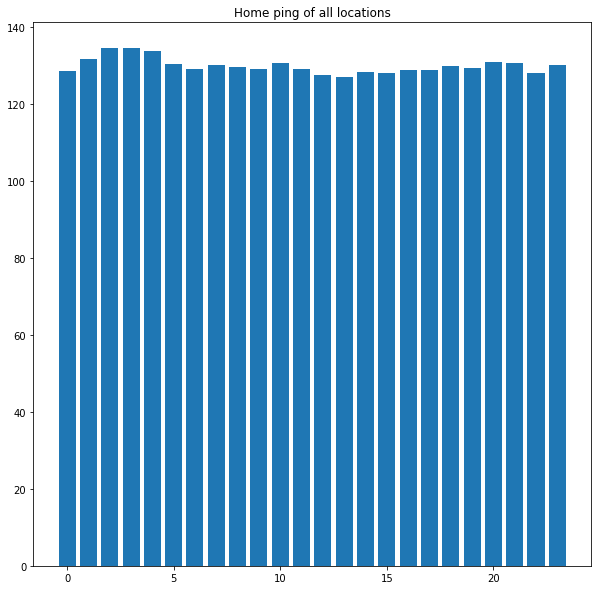

In [481]:
plt.figure(figsize=(10,10))
plt.bar(df_star.index, df_star.values)
plt.title("Home ping of all locations")
plt.show()

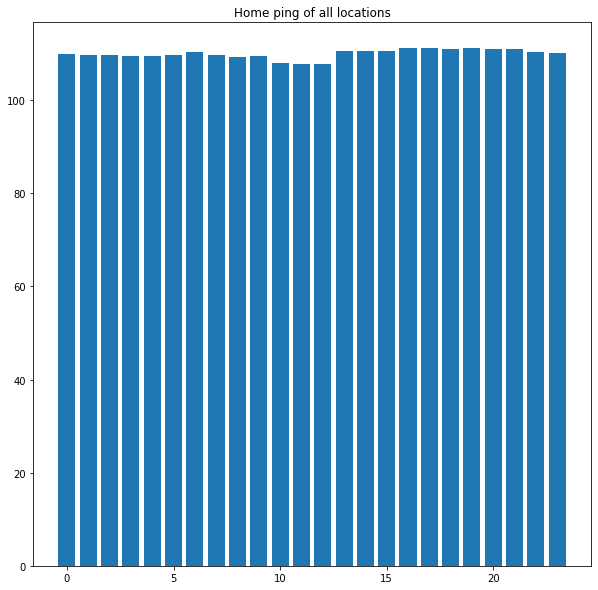

In [367]:
plt.figure(figsize=(10,10))
plt.bar(df_home.index, df_home.values)
plt.title("Home ping of all locations")
plt.show()

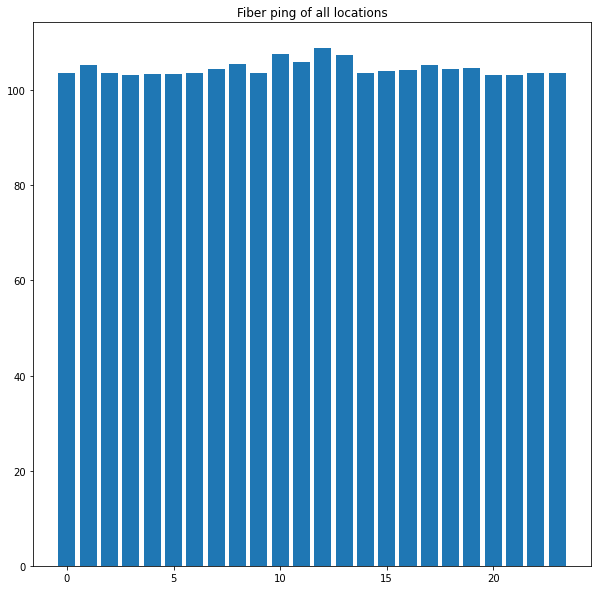

In [368]:
plt.figure(figsize=(10,10))
plt.bar(df_fiber.index, df_fiber.values)
plt.title("Fiber ping of all locations")
plt.show()

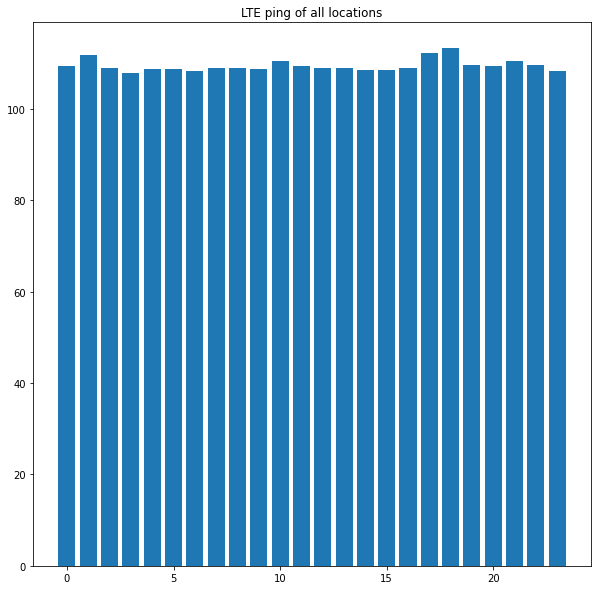

In [369]:
plt.figure(figsize=(10,10))
plt.bar(df_lte.index, df_lte.values)
plt.title("LTE ping of all locations")
plt.show()

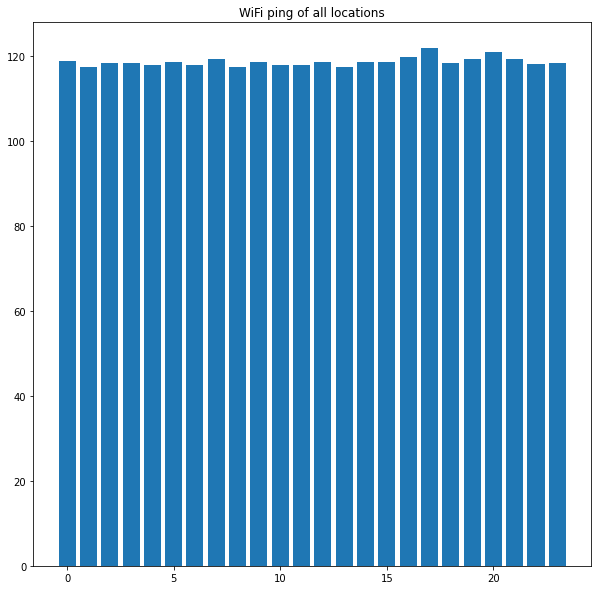

In [370]:
plt.figure(figsize=(10,10))
plt.bar(df_wifi.index, df_wifi.values)
plt.title("WiFi ping of all locations")
plt.show()

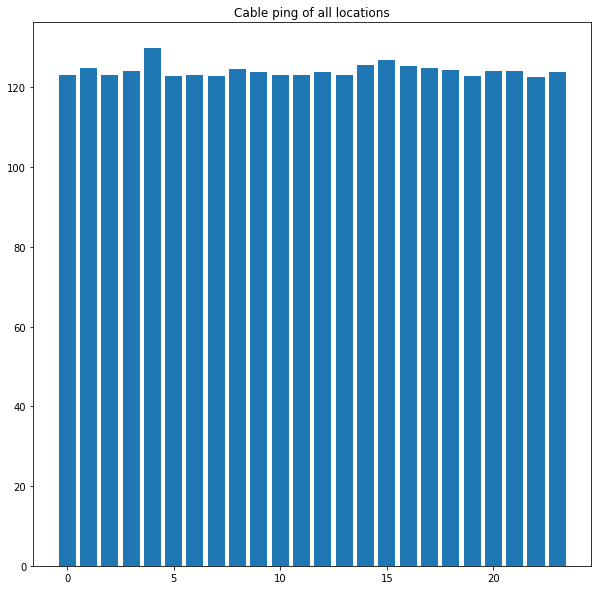

In [371]:
plt.figure(figsize=(10,10))
plt.bar(df_cable.index, df_cable.values)
plt.title("Cable ping of all locations")
plt.show()

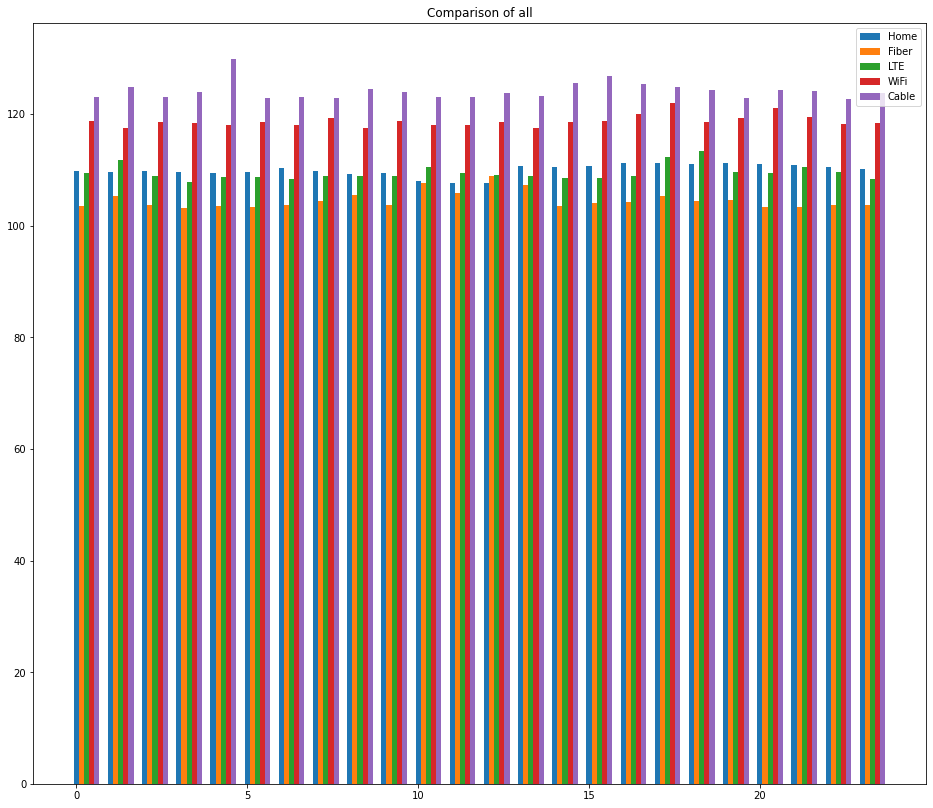

In [435]:
plt.figure(figsize=(16,14))
width = 0.15
plt.bar(df_home.index, df_home.values, width, label="Home")
plt.bar(df_fiber.index+width, df_fiber.values, width, label="Fiber")
plt.bar(df_lte.index+width*2, df_lte.values, width, label="LTE")
plt.bar(df_wifi.index+width*3, df_wifi.values, width, label="WiFi")
plt.bar(df_cable.index+width*4, df_cable.values, width, label="Cable")
plt.legend()
plt.title("Comparison of all")
plt.show()

### UK latency

In [255]:
UK_homeping = df_homeping.loc[df_homeping['loc'] == 'UK']
UK_fiberping = df_fiberping.loc[df_fiberping['loc'] == 'UK']
UK_lteping = df_lteping.loc[df_lteping['loc'] == 'UK']
UK_wifiping = df_wifiping.loc[df_wifiping['loc'] == 'UK']
UK_cableping = df_cableping.loc[df_cableping['loc'] == 'UK']


UK Description

In [278]:
UK_homeping.describe()

,fw,timestamp,min,max,avg
count,15365.000000,15365.000000,15365.000000,15365.000000,15365.000000
mean,5051.798243,11.506801,69.128409,73.267035,70.902050
std,81.820130,6.924494,65.221046,68.669803,65.910075
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,6.000000,22.000000,26.000000,24.000000
50%,5080.000000,12.000000,36.000000,38.000000,37.000000
75%,5080.000000,18.000000,108.000000,110.000000,109.000000
max,5080.000000,23.000000,384.000000,1321.000000,853.000000


In [279]:
UK_fiberping.describe()

,fw,timestamp,min,max,avg
count,13372.0,13372.000000,13372.000000,13372.000000,13372.000000
mean,4790.0,11.504412,46.761367,53.193763,49.460215
std,0.0,6.921738,63.370732,143.795771,96.727672
min,4790.0,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.0,6.000000,20.000000,21.000000,21.000000
50%,4790.0,12.000000,28.000000,30.000000,29.000000
75%,4790.0,17.000000,38.000000,41.000000,39.000000
max,4790.0,23.000000,2643.000000,10507.000000,7013.000000


In [280]:
UK_lteping.describe()


,fw,timestamp,min,max,avg
count,23102.000000,23102.000000,23102.000000,23102.000000,23102.000000
mean,5046.217946,11.426154,65.013635,73.907497,68.956627
std,84.495667,6.936145,66.102012,79.350669,70.192971
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,25.000000,26.000000,26.000000
50%,5080.000000,11.000000,42.000000,48.000000,45.000000
75%,5080.000000,17.000000,77.000000,88.000000,80.000000
max,5081.000000,23.000000,761.000000,1016.000000,763.000000


In [281]:
UK_wifiping.describe()

,fw,timestamp,min,max,avg
count,12609.000000,12609.000000,12609.000000,12609.000000,12609.000000
mean,5061.114283,11.496312,75.814577,80.529384,77.910540
std,58.436186,6.929016,64.189123,69.524396,65.951469
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,31.000000,32.000000,31.000000
50%,5080.000000,11.000000,41.000000,47.000000,43.000000
75%,5080.000000,18.000000,108.000000,112.000000,110.000000
max,5080.000000,23.000000,801.000000,1160.000000,845.000000


In [282]:
UK_cableping.describe()

,fw,timestamp,min,max,avg
count,25288.000000,25288.000000,25288.000000,25288.000000,25288.000000
mean,4907.735685,11.500593,81.001700,88.282703,84.092534
std,141.014036,6.921602,73.727104,126.415797,87.201401
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.000000,5.750000,28.000000,34.000000,31.000000
50%,4790.000000,12.000000,45.000000,52.000000,49.000000
75%,5080.000000,17.000000,126.250000,130.000000,128.000000
max,5080.000000,23.000000,3564.000000,11380.000000,5552.000000


UK latency plot (average latency per hour)

In [298]:
UK_df_home = UK_homeping.groupby('timestamp')['avg'].mean()
UK_df_fiber = UK_fiberping.groupby('timestamp')['avg'].mean()
UK_df_lte = UK_lteping.groupby('timestamp')['avg'].mean()
UK_df_wifi = UK_wifiping.groupby('timestamp')['avg'].mean()
UK_df_cable = UK_cableping.groupby('timestamp')['avg'].mean()

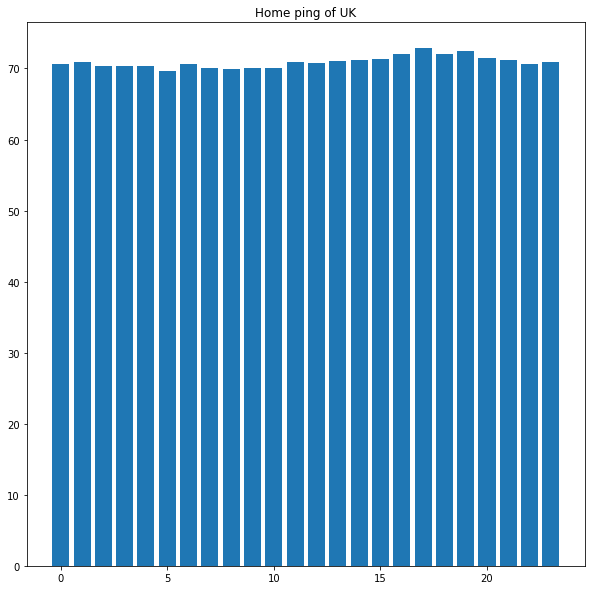

In [309]:
plt.figure(figsize=(10,10))
plt.bar(UK_df_home.index, UK_df_home.values)
plt.title("Home ping of UK")
plt.show()

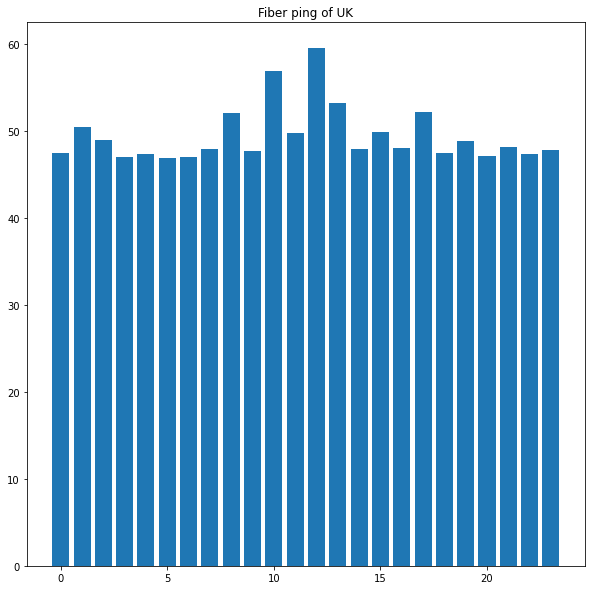

In [312]:
plt.figure(figsize=(10,10))
plt.bar(UK_df_fiber.index, UK_df_fiber.values)
plt.title("Fiber ping of UK")
plt.show()

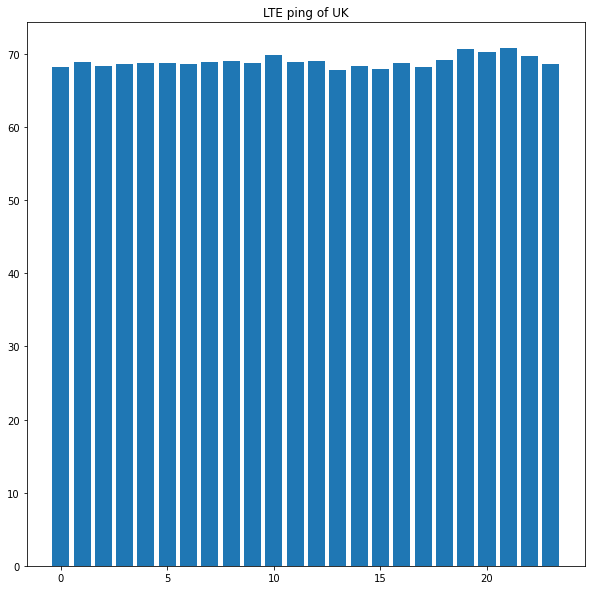

In [313]:
plt.figure(figsize=(10,10))
plt.bar(UK_df_lte.index, UK_df_lte.values)
plt.title("LTE ping of UK")
plt.show()

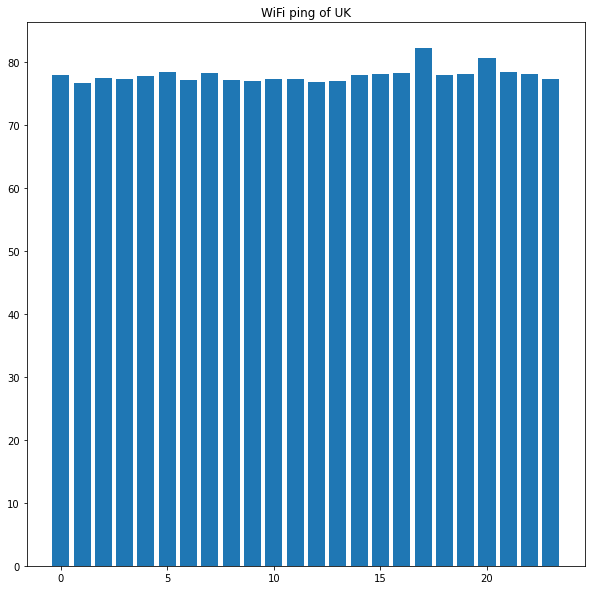

In [314]:
plt.figure(figsize=(10,10))
plt.bar(UK_df_wifi.index, UK_df_wifi.values)
plt.title("WiFi ping of UK")
plt.show()

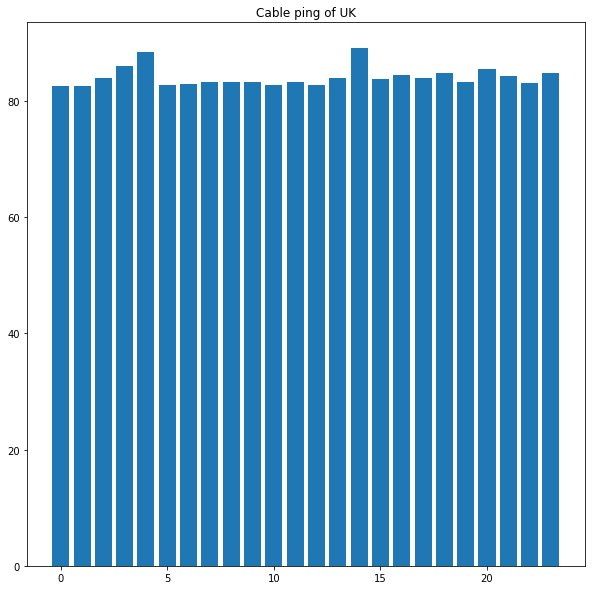

In [315]:
plt.figure(figsize=(10,10))
plt.bar(UK_df_cable.index, UK_df_cable.values)
plt.title("Cable ping of UK")
plt.show()

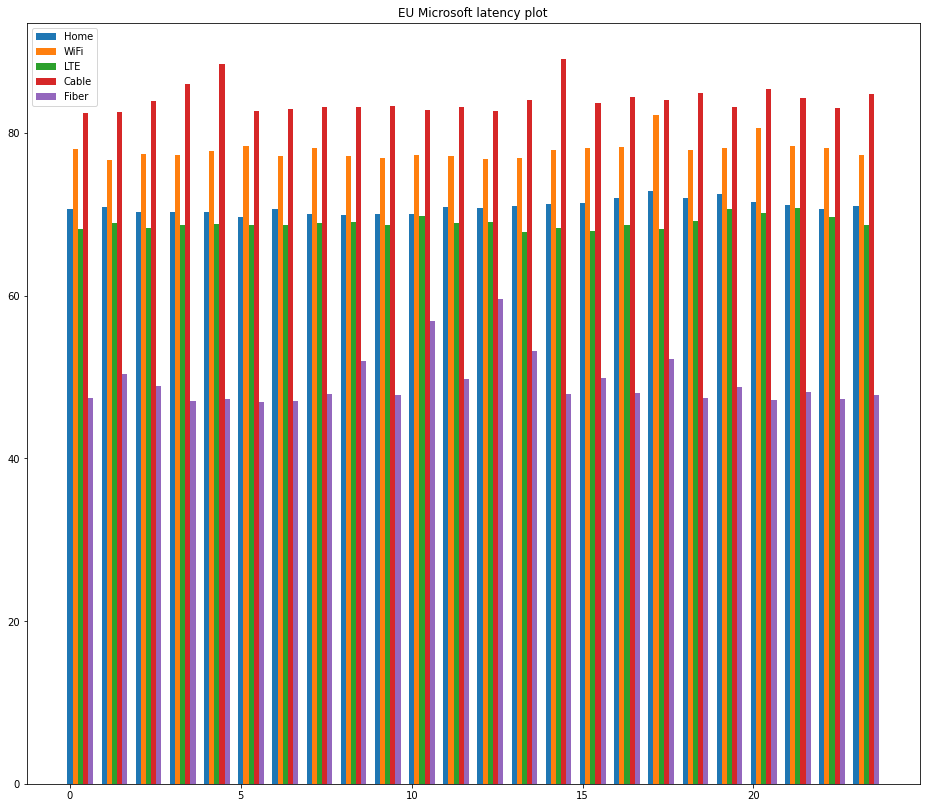

In [436]:
plt.figure(figsize=(16,14))
width = 0.15
plt.bar(UK_df_home.index, UK_df_home.values, width, label="Home")
plt.bar(UK_df_wifi.index+width, UK_df_wifi.values, width, label="WiFi")
plt.bar(UK_df_lte.index+width*2, UK_df_lte.values, width, label="LTE")
plt.bar(UK_df_cable.index+width*3, UK_df_cable.values, width, label="Cable")
plt.bar(UK_df_fiber.index+width*4, UK_df_fiber.values, width, label="Fiber")
plt.legend()
plt.title("EU Microsoft latency plot")
plt.show()

UK/DE Amazon latency

In [376]:
AZ_homeping = df_homeping.loc[df_homeping['loc'] == 'EU_AZ']
AZ_wifiping = df_wifiping.loc[df_wifiping['loc'] == 'EU_AZ']
AZ_lteping = df_lteping.loc[df_lteping['loc'] == 'EU_AZ']

EU Amazon description

In [377]:
AZ_homeping.describe()

,fw,timestamp,min,max,avg
count,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000
mean,5051.426577,11.503025,67.724110,71.272167,69.238888
std,82.641927,6.920526,65.675805,68.858788,66.359603
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,6.000000,19.000000,21.000000,20.000000
50%,5080.000000,12.000000,31.000000,36.000000,33.000000
75%,5080.000000,17.750000,114.000000,118.000000,116.000000
max,5080.000000,23.000000,366.000000,769.000000,597.000000


In [378]:
AZ_wifiping.describe()

,fw,timestamp,min,max,avg
count,7221.000000,7221.00000,7221.000000,7221.000000,7221.000000
mean,5061.121728,11.48539,74.722199,79.903891,76.969949
std,58.433040,6.92128,65.599505,74.415753,68.280504
min,4790.000000,0.00000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.00000,29.000000,31.000000,30.000000
50%,5080.000000,11.00000,42.000000,47.000000,44.000000
75%,5080.000000,17.00000,102.000000,106.000000,103.000000
max,5080.000000,23.00000,788.000000,1426.000000,788.000000


In [375]:
AZ_lteping.describe()

,fw,timestamp,min,max,avg
count,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000
mean,5052.851817,11.466542,73.739049,89.752097,80.813048
std,75.976329,6.919442,64.486049,82.266373,70.185659
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,35.000000,41.000000,38.000000
50%,5080.000000,11.000000,50.000000,63.000000,57.000000
75%,5080.000000,17.000000,89.000000,106.000000,95.000000
max,5080.000000,23.000000,456.000000,909.000000,534.000000


EU Amazon latency plot (avg per hour)

In [379]:
AZ_df_home = AZ_homeping.groupby('timestamp')['avg'].mean()
AZ_df_lte = AZ_lteping.groupby('timestamp')['avg'].mean()
AZ_df_wifi = AZ_wifiping.groupby('timestamp')['avg'].mean()

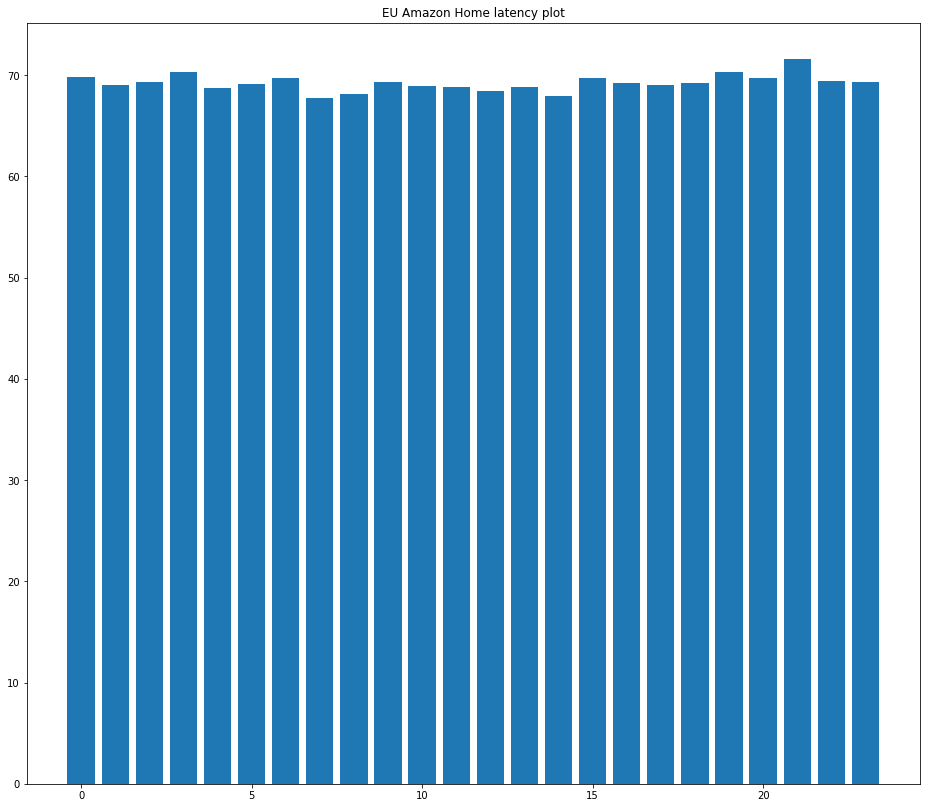

In [430]:
plt.figure(figsize=(16,14))
plt.bar(AZ_df_home.index, AZ_df_home.values)
plt.title("EU Amazon Home latency plot")
plt.show()

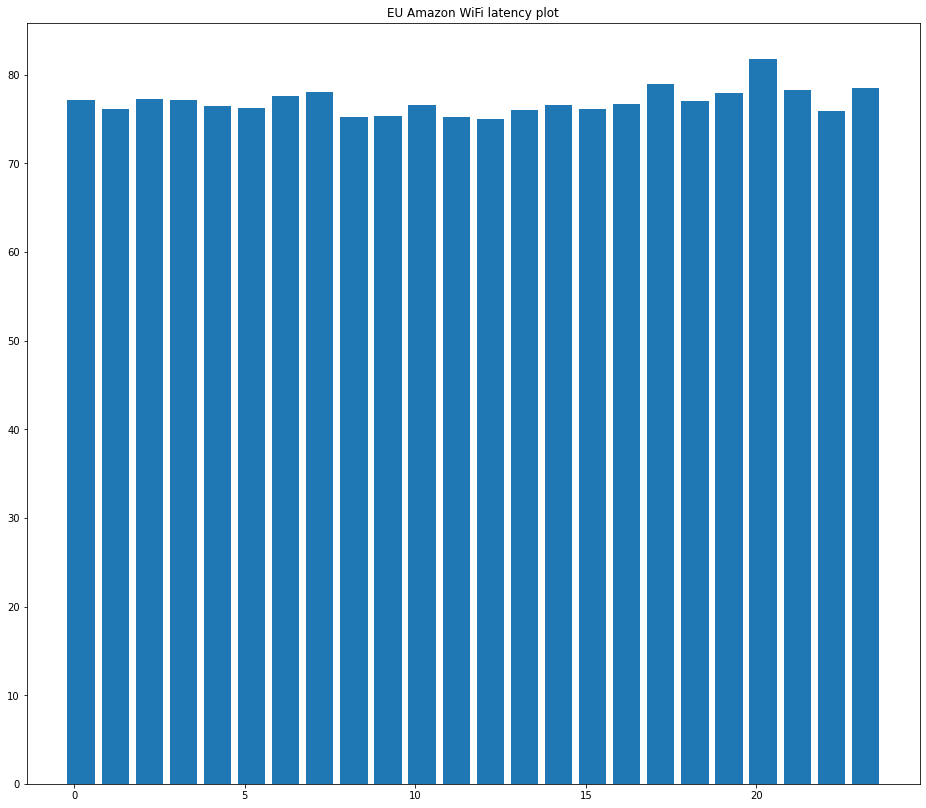

In [431]:
plt.figure(figsize=(16,14))

plt.bar(AZ_df_wifi.index+width, AZ_df_wifi.values)

plt.title("EU Amazon WiFi latency plot")
plt.show()

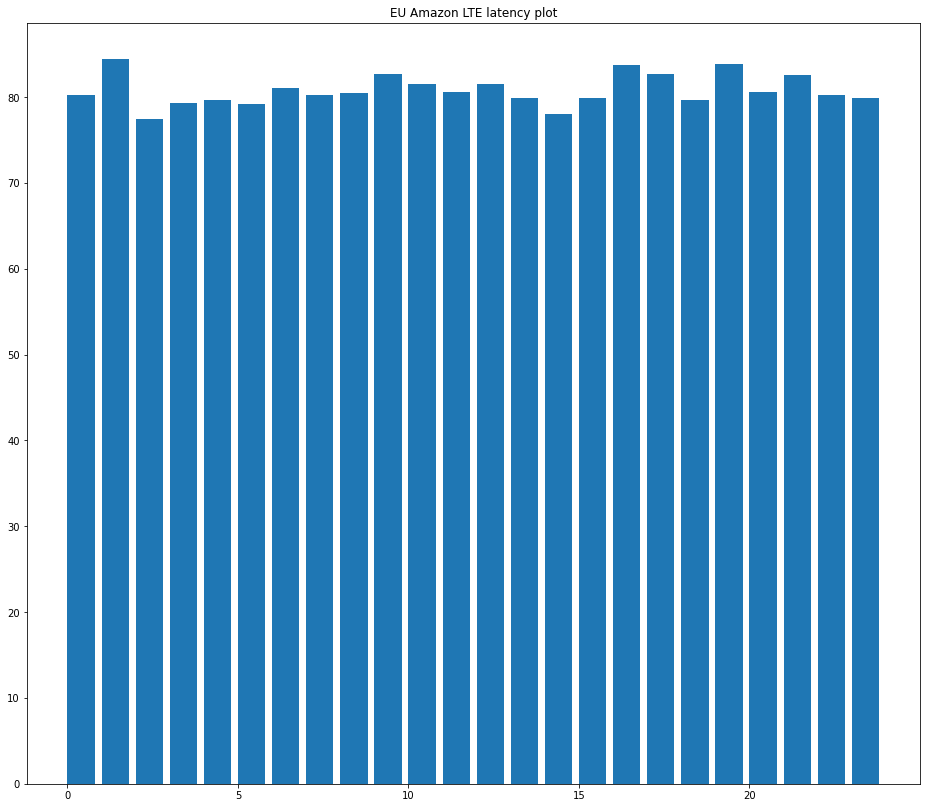

In [432]:
plt.figure(figsize=(16,14))
plt.bar(AZ_df_lte.index+width*2, AZ_df_lte.values)
plt.title("EU Amazon LTE latency plot")
plt.show()

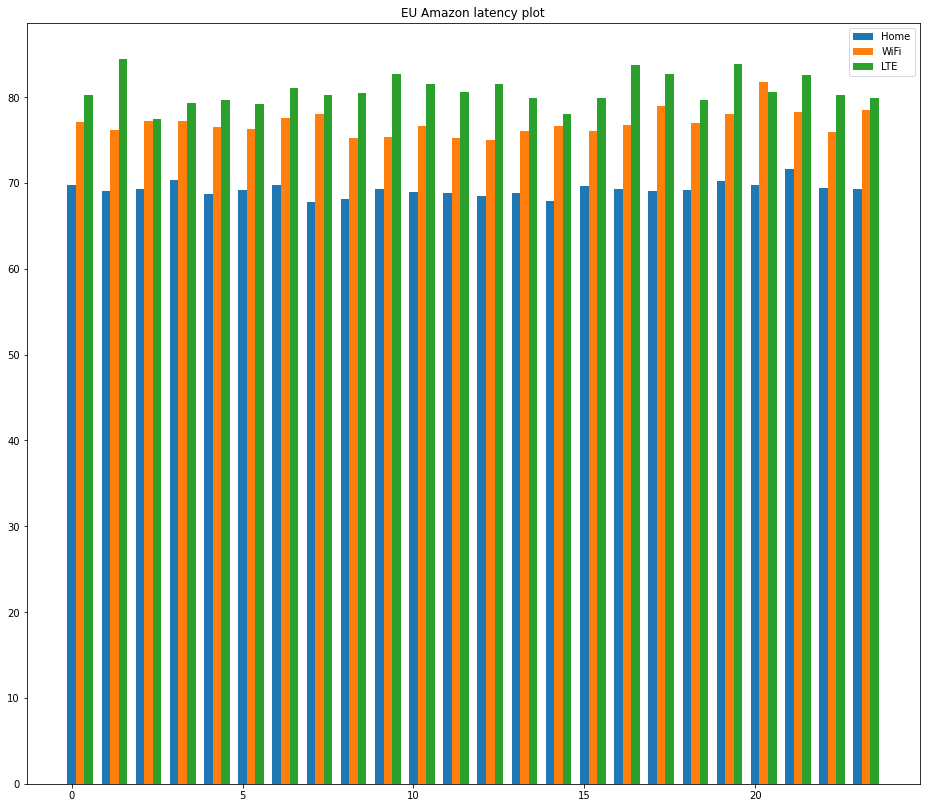

In [419]:
plt.figure(figsize=(16,14))
width = 0.25
plt.bar(AZ_df_home.index, AZ_df_home.values, width, label="Home")
plt.bar(AZ_df_wifi.index+width, AZ_df_wifi.values, width, label="WiFi")
plt.bar(AZ_df_lte.index+width*2, AZ_df_lte.values, width, label="LTE")
plt.legend()
plt.title("EU Amazon latency plot")
plt.show()

### Comparing providers

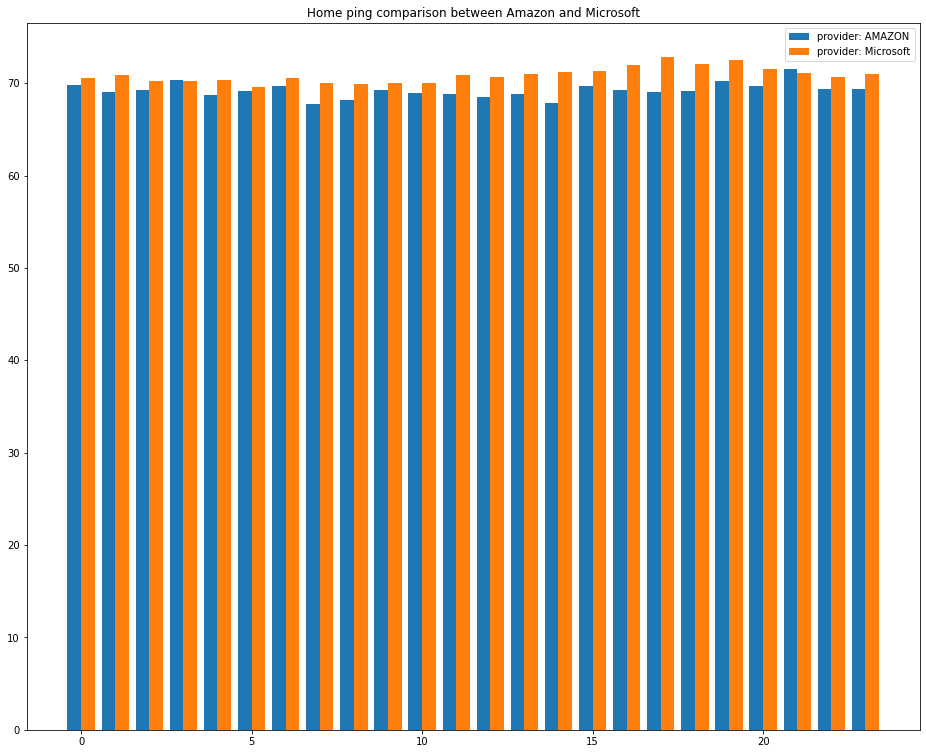

In [427]:
plt.figure(figsize=(16,13))
width = 0.2
plt.bar(AZ_df_home.index-width, AZ_df_home.values, width*2, label="provider: AMAZON")
plt.bar(UK_df_home.index+width, UK_df_home.values, width*2, label="provider: Microsoft")
plt.legend()
plt.title("Home ping comparison between Amazon and Microsoft")
plt.show()

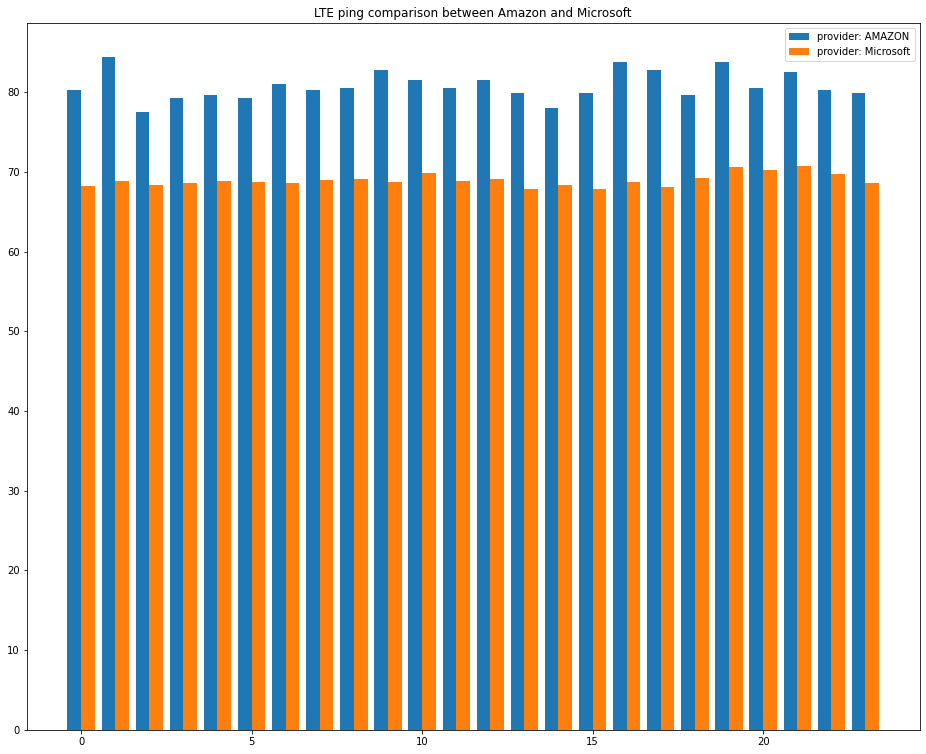

In [428]:
plt.figure(figsize=(16,13))
width = 0.2
plt.bar(AZ_df_lte.index-width, AZ_df_lte.values, width*2, label="provider: AMAZON")
plt.bar(UK_df_lte.index+width, UK_df_lte.values, width*2, label="provider: Microsoft")
plt.legend()
plt.title("LTE ping comparison between Amazon and Microsoft")
plt.show()

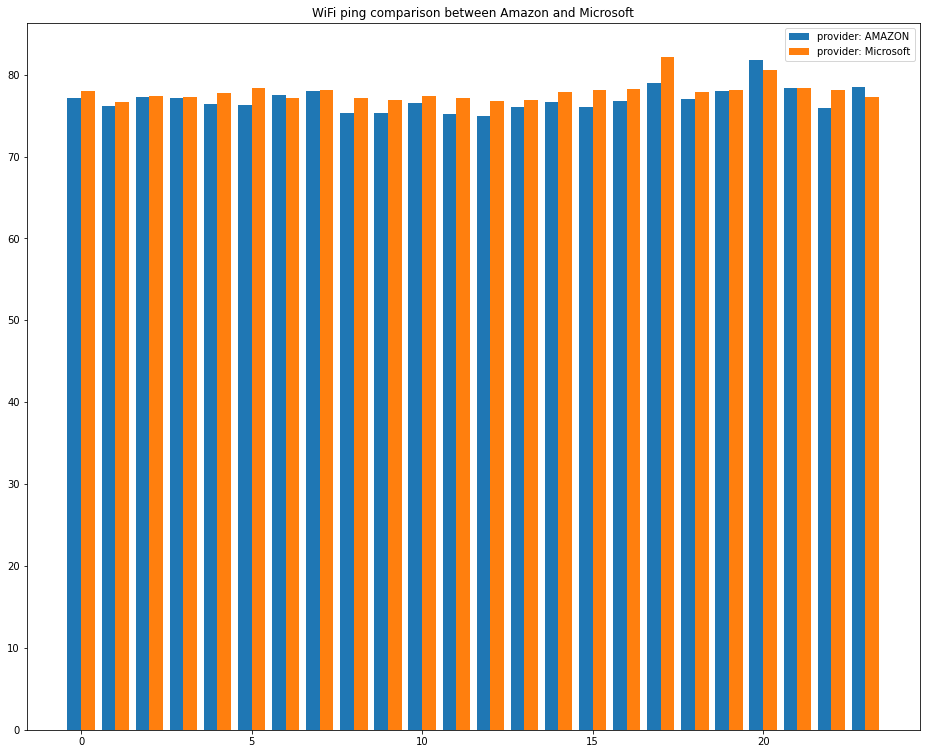

In [429]:
plt.figure(figsize=(16,13))
width = 0.2
plt.bar(AZ_df_wifi.index-width, AZ_df_wifi.values, width*2, label="provider: AMAZON")
plt.bar(UK_df_wifi.index+width, UK_df_wifi.values, width*2, label="provider: Microsoft")
plt.legend()
plt.title("WiFi ping comparison between Amazon and Microsoft")
plt.show()

Canada latency

In [257]:
CA_homeping = df_homeping.loc[df_homeping['loc'] == 'CA']
CA_fiberping = df_fiberping.loc[df_fiberping['loc'] == 'CA']
CA_lteping = df_lteping.loc[df_lteping['loc'] == 'CA']
CA_wifiping = df_wifiping.loc[df_wifiping['loc'] == 'CA']
CA_cableping = df_cableping.loc[df_cableping['loc'] == 'CA']

Canada Description

In [267]:
CA_homeping.describe()

,fw,timestamp,min,max,avg
count,15392.000000,15392.000000,15392.000000,15392.000000,15392.000000
mean,5051.828872,11.506627,112.816593,116.994997,114.609537
std,81.751511,6.924579,55.975643,60.589217,56.769648
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,6.000000,90.000000,91.000000,90.000000
50%,5080.000000,12.000000,108.000000,110.000000,109.000000
75%,5080.000000,18.000000,122.000000,126.000000,123.000000
max,5080.000000,23.000000,565.000000,1581.000000,657.000000


In [268]:
CA_fiberping.describe()

,fw,timestamp,min,max,avg
count,13369.0,13369.000000,13369.000000,13369.000000,13369.000000
mean,4790.0,11.506695,108.874112,114.760341,111.174882
std,0.0,6.921493,41.035318,79.849338,51.705726
min,4790.0,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.0,6.000000,95.000000,96.000000,96.000000
50%,4790.0,12.000000,102.000000,103.000000,103.000000
75%,4790.0,17.000000,112.000000,116.000000,114.000000
max,4790.0,23.000000,856.000000,4406.000000,2210.000000


In [270]:
CA_lteping.describe()

,fw,timestamp,min,max,avg
count,9642.000000,9642.000000,9642.00000,9642.000000,9642.000000
mean,5054.602780,11.487866,141.37430,160.561087,149.807509
std,75.281396,6.929768,60.12641,85.926680,68.421992
min,4770.000000,0.000000,-1.00000,-1.000000,-1.000000
25%,5080.000000,5.000000,113.00000,120.000000,118.000000
50%,5080.000000,11.000000,130.00000,142.000000,136.000000
75%,5080.000000,17.750000,154.00000,180.000000,169.000000
max,5080.000000,23.000000,954.00000,1125.000000,966.000000


In [271]:
CA_wifiping.describe()

,fw,timestamp,min,max,avg
count,12585.000000,12585.000000,12585.000000,12585.000000,12585.000000
mean,5061.078268,11.491299,131.748828,138.209058,134.547716
std,58.486057,6.930413,60.535103,82.493489,65.411111
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,103.000000,104.000000,104.000000
50%,5080.000000,11.000000,114.000000,119.000000,117.000000
75%,5080.000000,18.000000,156.000000,162.000000,159.000000
max,5080.000000,23.000000,775.000000,4590.000000,1700.000000


In [272]:
CA_cableping.describe()

,fw,timestamp,min,max,avg
count,25288.000000,25288.000000,25288.000000,25288.000000,25288.000000
mean,4907.725008,11.499525,111.734499,121.853646,115.937559
std,141.011102,6.920510,65.877252,228.204694,113.762851
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.000000,5.750000,87.000000,90.000000,89.000000
50%,4790.000000,12.000000,106.000000,111.000000,109.000000
75%,5080.000000,18.000000,130.000000,134.000000,132.000000
max,5080.000000,23.000000,3511.000000,22694.000000,7901.000000


Canada latency plot (avg per hour)

In [316]:
CA_df_home = CA_homeping.groupby('timestamp')['avg'].mean()
CA_df_fiber = CA_fiberping.groupby('timestamp')['avg'].mean()
CA_df_lte = CA_lteping.groupby('timestamp')['avg'].mean()
CA_df_wifi = CA_wifiping.groupby('timestamp')['avg'].mean()
CA_df_cable = CA_cableping.groupby('timestamp')['avg'].mean()

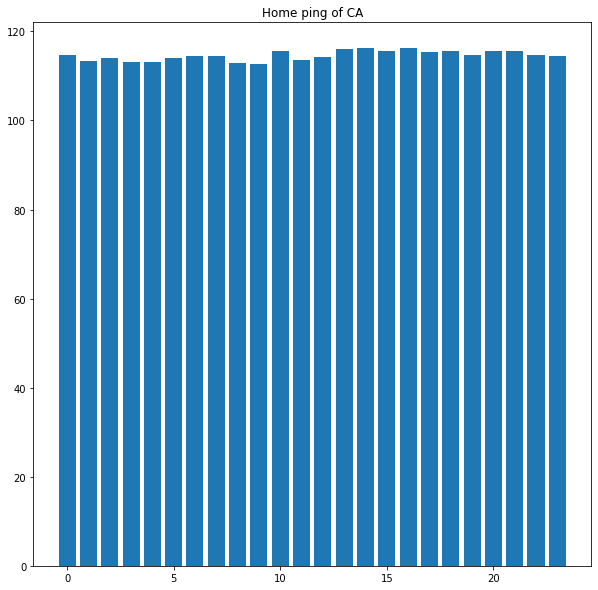

In [317]:
plt.figure(figsize=(10,10))
plt.bar(CA_df_home.index, CA_df_home.values)
plt.title("Home ping of CA")
plt.show()

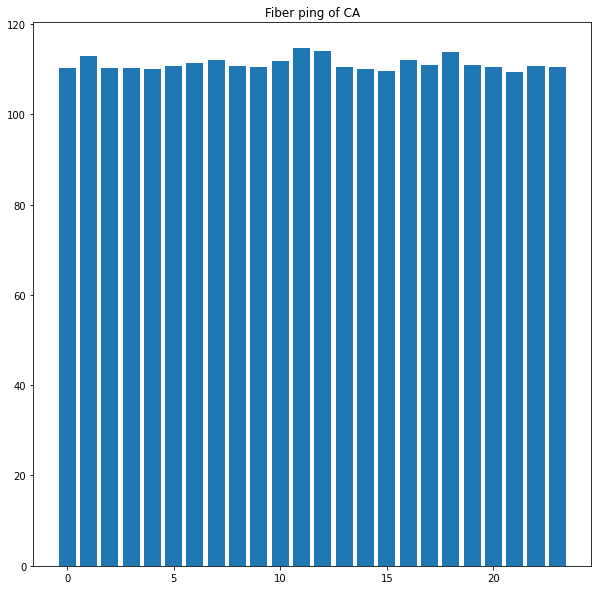

In [318]:
plt.figure(figsize=(10,10))
plt.bar(CA_df_fiber.index, CA_df_fiber.values)
plt.title("Fiber ping of CA")
plt.show()

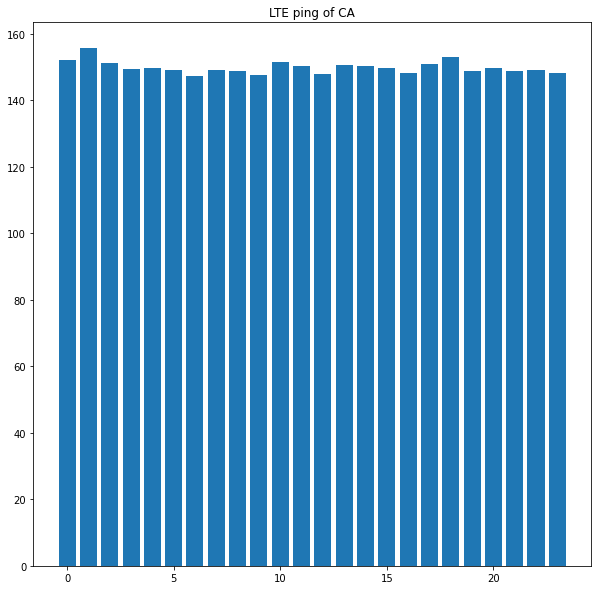

In [319]:
plt.figure(figsize=(10,10))
plt.bar(CA_df_lte.index, CA_df_lte.values)
plt.title("LTE ping of CA")
plt.show()

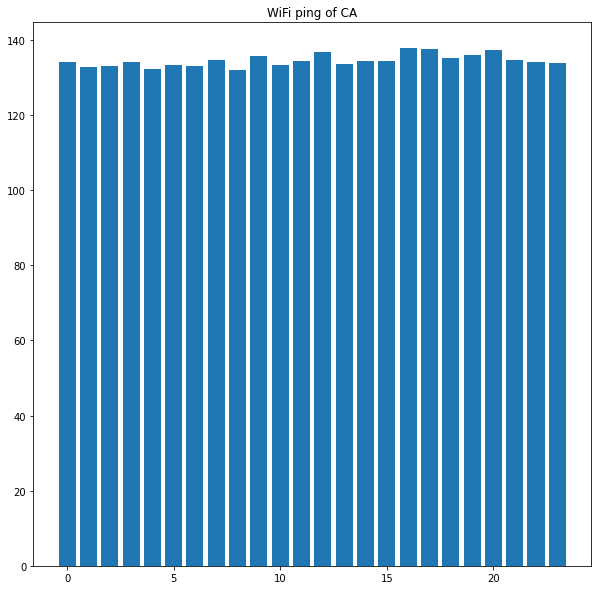

In [320]:
plt.figure(figsize=(10,10))
plt.bar(CA_df_wifi.index, CA_df_wifi.values)
plt.title("WiFi ping of CA")
plt.show()

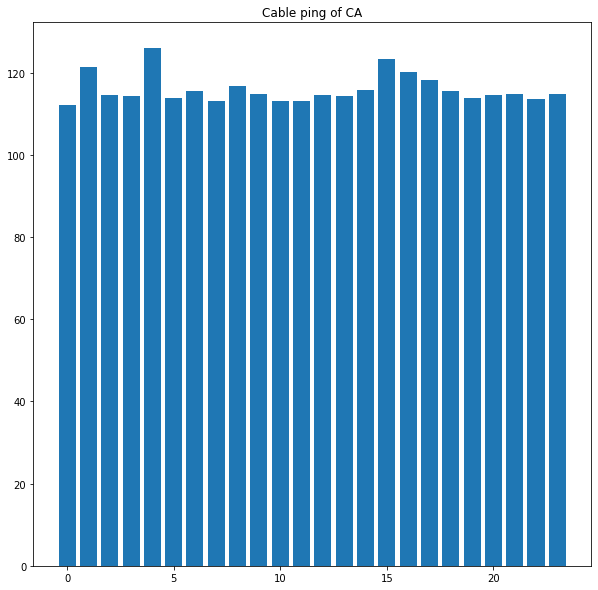

In [321]:
plt.figure(figsize=(10,10))
plt.bar(CA_df_cable.index, CA_df_cable.values)
plt.title("Cable ping of CA")
plt.show()

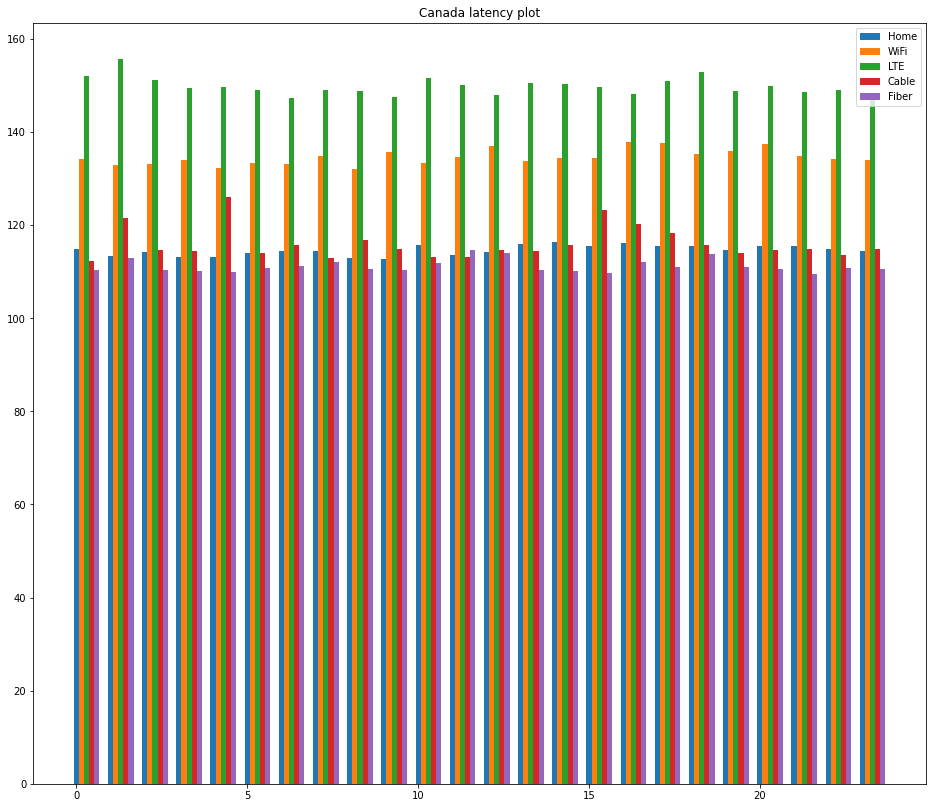

In [425]:
plt.figure(figsize=(16,14))
width = 0.15
plt.bar(CA_df_home.index, CA_df_home.values, width, label="Home")
plt.bar(CA_df_wifi.index+width, CA_df_wifi.values, width, label="WiFi")
plt.bar(CA_df_lte.index+width*2, CA_df_lte.values, width, label="LTE")
plt.bar(CA_df_cable.index+width*3, CA_df_cable.values, width, label="Cable")
plt.bar(CA_df_fiber.index+width*4, CA_df_fiber.values, width, label="Fiber")
plt.legend()
plt.title("Canada latency plot")
plt.show()

India latency

In [261]:
IN_homeping = df_homeping.loc[df_homeping['loc'] == 'IN']
IN_fiberping = df_fiberping.loc[df_fiberping['loc'] == 'IN']
IN_lteping = df_lteping.loc[df_lteping['loc'] == 'IN']
IN_wifiping = df_wifiping.loc[df_wifiping['loc'] == 'IN']
IN_cableping = df_cableping.loc[df_cableping['loc'] == 'IN']

India Description

In [273]:
IN_homeping.describe()

,fw,timestamp,min,max,avg
count,15091.000000,15091.000000,15091.000000,15091.000000,15091.000000
mean,5051.798423,11.517792,166.477371,170.638858,168.278908
std,81.819109,6.985671,57.487951,61.268482,58.255282
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,135.000000,138.000000,136.000000
50%,5080.000000,12.000000,147.000000,149.000000,148.000000
75%,5080.000000,18.000000,202.000000,204.000000,203.000000
max,5080.000000,23.000000,373.000000,860.000000,378.000000


In [274]:
IN_fiberping.describe()

,fw,timestamp,min,max,avg
count,13371.0,13371.000000,13371.000000,13371.000000,13371.000000
mean,4790.0,11.505347,150.851395,156.638546,153.071124
std,0.0,6.922027,40.311511,67.997428,49.483732
min,4790.0,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.0,6.000000,131.000000,133.000000,132.000000
50%,4790.0,12.000000,138.000000,142.000000,140.000000
75%,4790.0,17.000000,152.000000,155.000000,153.000000
max,4790.0,23.000000,1736.000000,5123.000000,3430.000000


In [275]:
IN_lteping.describe()

,fw,timestamp,min,max,avg
count,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000
mean,5054.666667,11.483878,174.629964,191.602177,182.065630
std,75.175071,6.929915,55.306205,75.075370,61.143042
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,145.000000,151.000000,149.000000
50%,5080.000000,11.000000,157.000000,168.000000,162.000000
75%,5080.000000,17.000000,196.000000,225.000000,208.000000
max,5080.000000,23.000000,692.000000,1719.000000,1163.000000


In [276]:
IN_wifiping.describe()

,fw,timestamp,min,max,avg
count,12683.000000,12683.000000,12683.000000,12683.000000,12683.000000
mean,5061.201608,11.495466,165.095088,170.316171,167.358590
std,58.332698,6.929685,63.463754,69.062291,64.985416
min,4790.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,5080.000000,5.000000,134.000000,136.000000,135.000000
50%,5080.000000,11.000000,144.000000,147.000000,145.000000
75%,5080.000000,18.000000,207.000000,210.000000,209.000000
max,5080.000000,23.000000,728.000000,1166.000000,747.000000


In [277]:
IN_cableping.describe()

,fw,timestamp,min,max,avg
count,25288.000000,25288.000000,25288.000000,25288.000000,25288.000000
mean,4907.725008,11.501938,168.454049,178.267597,172.377768
std,141.011102,6.922858,49.647058,117.401359,65.342894
min,4770.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4790.000000,5.750000,139.000000,143.000000,141.000000
50%,4790.000000,12.000000,151.000000,155.000000,154.000000
75%,5080.000000,17.000000,214.000000,219.000000,216.000000
max,5080.000000,23.000000,885.000000,7892.000000,4389.000000


India latency plot (avg latency per hour)

In [322]:
IN_df_home = IN_homeping.groupby('timestamp')['avg'].mean()
IN_df_fiber = IN_fiberping.groupby('timestamp')['avg'].mean()
IN_df_lte = IN_lteping.groupby('timestamp')['avg'].mean()
IN_df_wifi = IN_wifiping.groupby('timestamp')['avg'].mean()
IN_df_cable = IN_cableping.groupby('timestamp')['avg'].mean()

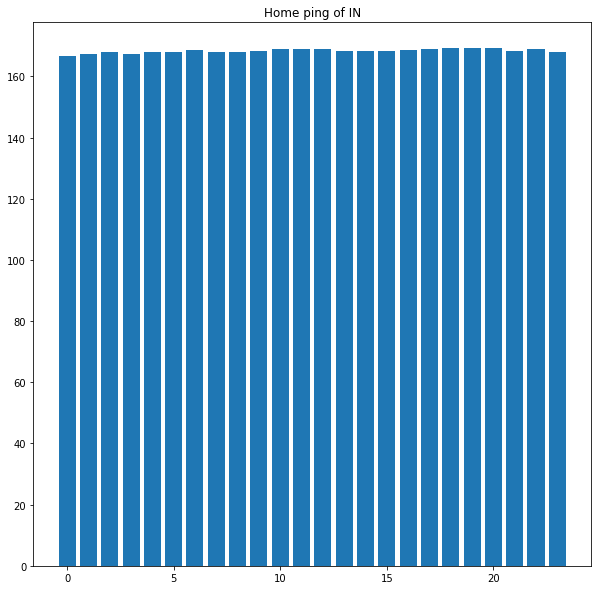

In [323]:
plt.figure(figsize=(10,10))
plt.bar(IN_df_home.index, IN_df_home.values)
plt.title("Home ping of IN")
plt.show()

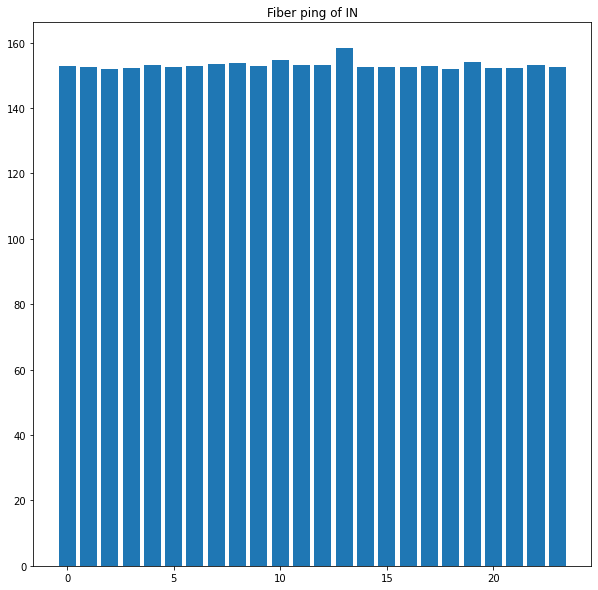

In [324]:
plt.figure(figsize=(10,10))
plt.bar(IN_df_fiber.index, IN_df_fiber.values)
plt.title("Fiber ping of IN")
plt.show()

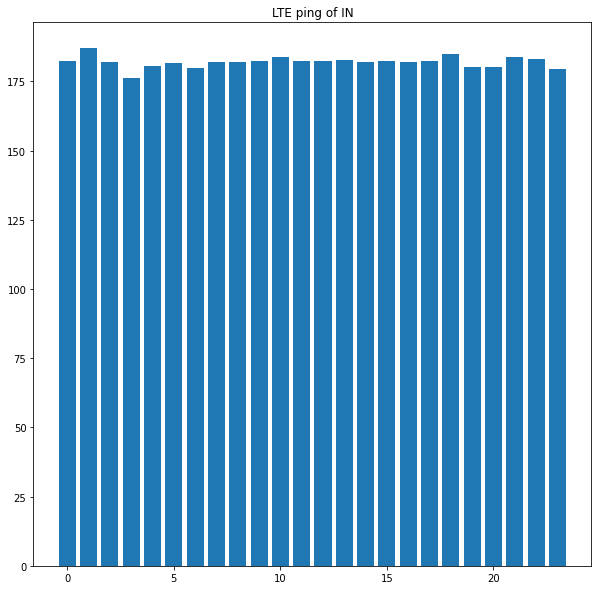

In [325]:
plt.figure(figsize=(10,10))
plt.bar(IN_df_lte.index, IN_df_lte.values)
plt.title("LTE ping of IN")
plt.show()

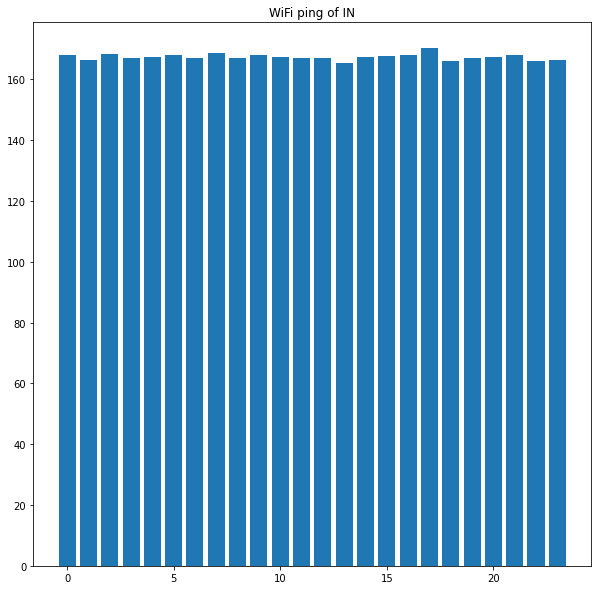

In [326]:
plt.figure(figsize=(10,10))
plt.bar(IN_df_wifi.index, IN_df_wifi.values)
plt.title("WiFi ping of IN")
plt.show()

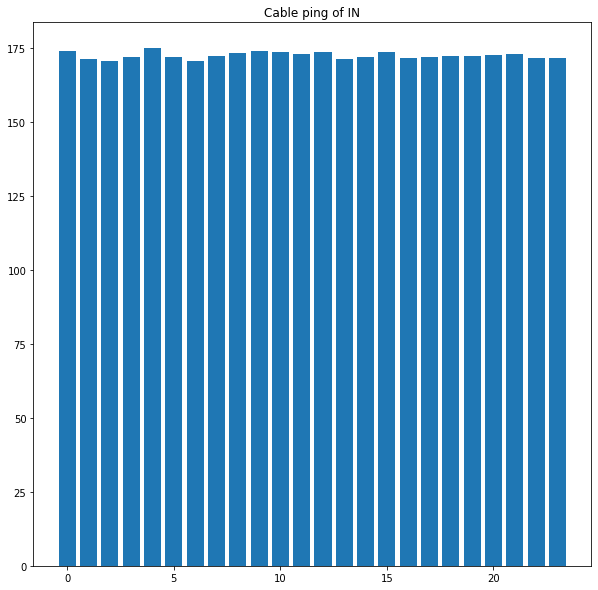

In [327]:
plt.figure(figsize=(10,10))
plt.bar(IN_df_cable.index, IN_df_cable.values)
plt.title("Cable ping of IN")
plt.show()

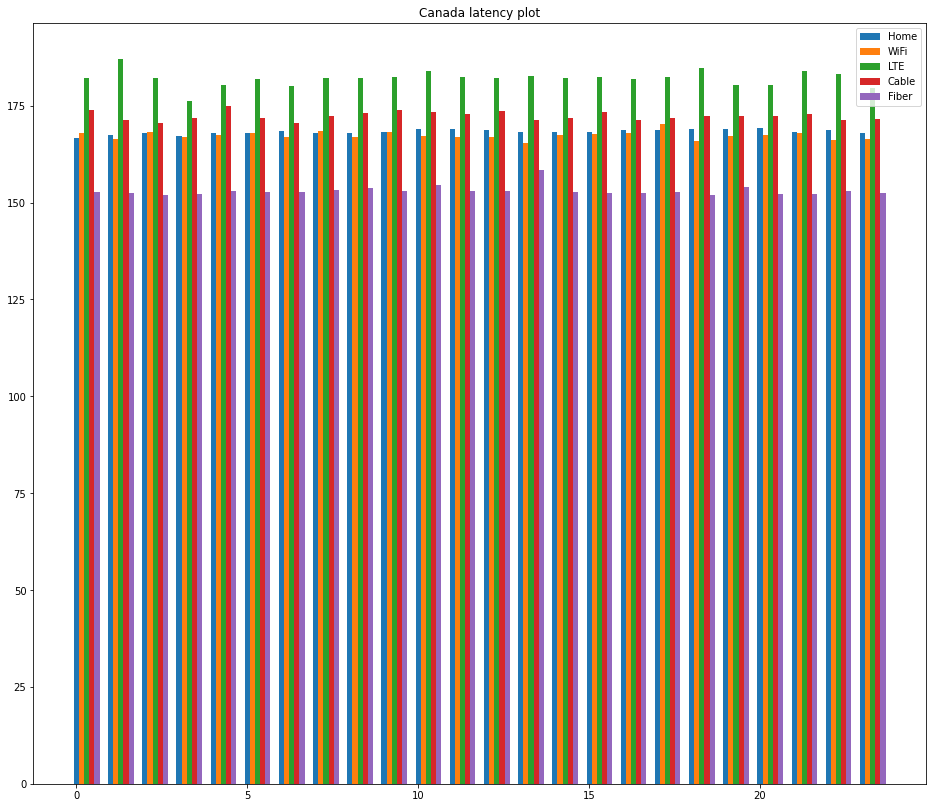

In [426]:
plt.figure(figsize=(16,14))
width = 0.15
plt.bar(IN_df_home.index, IN_df_home.values, width, label="Home")
plt.bar(IN_df_wifi.index+width, IN_df_wifi.values, width, label="WiFi")
plt.bar(IN_df_lte.index+width*2, IN_df_lte.values, width, label="LTE")
plt.bar(IN_df_cable.index+width*3, IN_df_cable.values, width, label="Cable")
plt.bar(IN_df_fiber.index+width*4, IN_df_fiber.values, width, label="Fiber")
plt.legend()
plt.title("Canada latency plot")
plt.show()